## panels for fig 2

#### Figure Purpose: Demonstrate visually the number and extent of annotations. 

Gantt plot for all annotations

In [1]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..', )))
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..', '..')))

from collections import Counter, OrderedDict
from pathlib import Path

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns
from nilearn.plotting import plot_markers

from config_colors import *
from config_paths import *
from config_plot_params import *
from nwb_io import *
from plot_patientwise_unit_distribution import *

# save panels directly to the relevant svg/ subdir
panel_save_dir = Path.cwd().parent.parent / "figure_generation" / "figure_annotations_overview" / "svg"

data_dir = NWB_data_dir

Loaded font name: Helvetica


In [2]:
## Load one patient file
nwbfile = load_patient(data_dir, 14)

In [3]:
annotations_base = nwbfile.stimulus["annotations_base"].to_dataframe()
annotations_base

,start_time,stop_time,label_name,entry_index,value
id,,,,,
0,0.040000,3346.358887,alison,1,0.0
1,3346.360107,3408.158936,alison,2,1.0
2,3408.174072,3418.678955,alison,3,0.0
3,3418.679932,3424.918945,alison,4,1.0
4,3424.919922,3428.918945,alison,5,0.0
...,...,...,...,...,...
20686,3855.840088,3858.158936,vance-faces,84,1.0
20687,3858.159912,5029.200195,vance-faces,85,0.0
20688,0.040000,3642.079102,wedding-venue,1,0.0


In [4]:
label_names = [
'tom',
'summer',
'mckenzie',
'paul',
'rachel',
'vance',
'millie',
'rhoda',
'secretary',
'alison',
'autumn',
'douche',
#
'tom-faces',
'summer-faces',
'mckenzie-faces',
'paul-faces',
'rachel-faces',
'vance-faces',
'millie-faces',
#
'Persons',
'summer-presence',
'summer-body-sequence',
#
'tom-speaking',
'summer-speaking',
#
'beach',
'bus',
'cafe',
'car',
'elevator',
'family-home',
'gallery',
'ikea',
'indoor-setting',
'karaoke-bar',
'office',
'other-cafe',
'park',
'punch-bar',
'record-store',
'restaurant',
'soccer-field',
'street',
'summer-apartment',
'summer-child-bedroom',
'theater',
'tom-apartment',
'tom-child-bedroom',
'train',
'wedding-venue',
#
'days-of-summer',
'camera-cuts',
'scenes',
#
'the-graduate', 
#
# 'bed',
# 'bench',
# 'book',
# 'bottle',
# 'buildings',
# 'chair',
# 'cup',
# 'handbag',
# 'tie',
]

In [5]:
label_categories = [
'character',
'character',
'character',
'character',
'character',
'character',
'character',
'character',
'character',
'character',
'character',
'character',
#
'faces',
'faces',
'faces',
'faces',
'faces',
'faces',
'faces',
#
"character-related",
"character-related",
"character-related",
#
"speaking",
"speaking",
#
'location',
'location',
'location',
'location',
'location',
'location',
'location',
'location',
'location',
'location',
'location',
'location',
'location',
'location',
'location',
'location',
'location',
'location',
'location',
'location',
'location',
'location',
'location',
'location',
'location',
#
"visual-transition",
"visual-transition",
"visual-transition",
#
"film-sequence"
#
# 'object',
# 'object',
# 'object',
# 'object',
# 'object',
# 'object',
# 'object',
# 'object',
# 'object',
# 'object',
]

In [11]:
# color definitions

category_face_colors = {
'character': "#E53E24",
'faces': "#FF8811",
'character-related': "#824C71",
'speaking': "#235789",
'location': "#54AEAD",
'visual-transition': "#FFFF33",
'film-sequence': "#B4E08F",
}

category_edge_colors = {
'character': "#E53E24",
'faces': "#F37616",
'character-related':  "#824C71",
'speaking': "#0B3954",
'location': "#2E6160",
'visual-transition': "#8F8F00",
'film-sequence': "#60A02C",
}

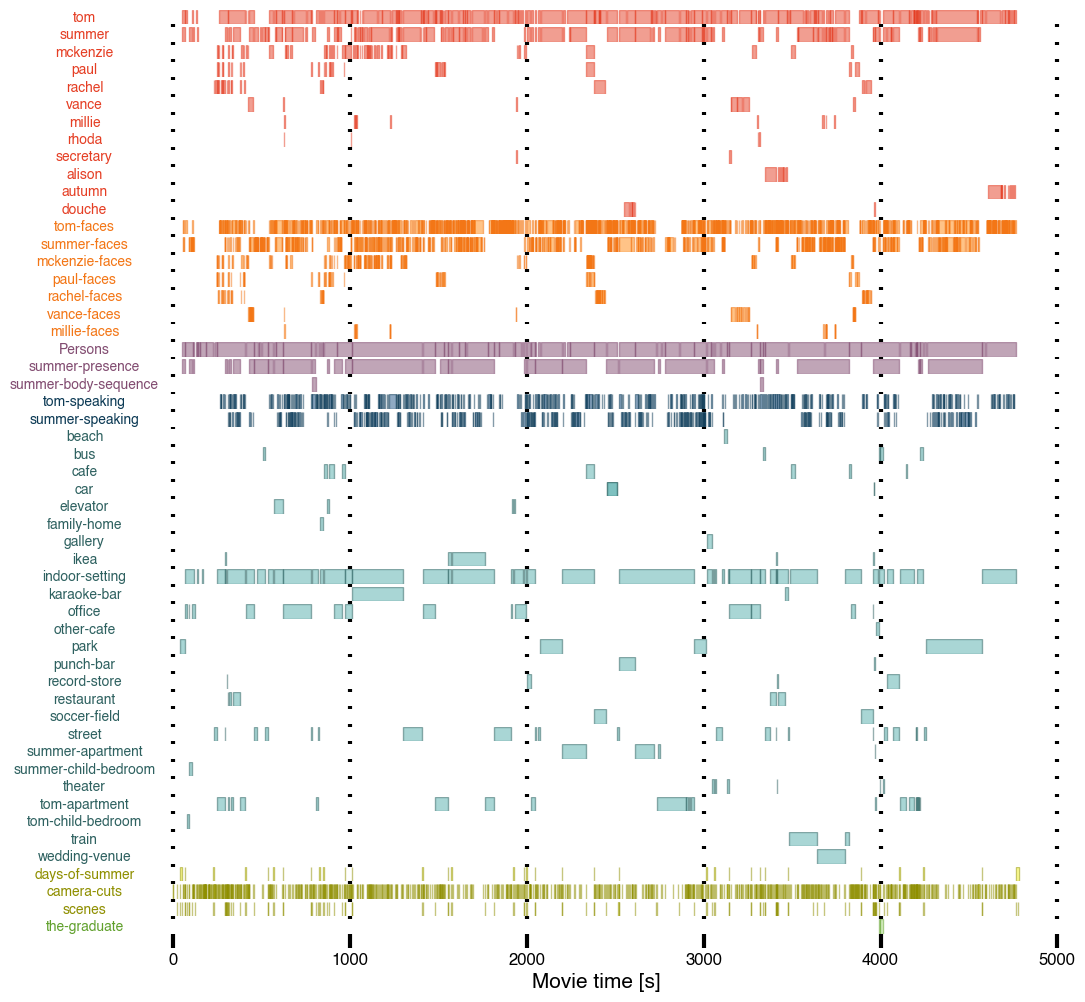

In [14]:
w = 12
h = 12

alpha = 0.5

nr_labels = len(label_names)
fig, axes = plt.subplots(nr_labels, 1, sharex=True, figsize=(w,h))

for i, label in enumerate(label_names):

    edgecolor = category_edge_colors[label_categories[i]]
    facecolor = category_face_colors[label_categories[i]]

    ax = axes[i]

    label_df = annotations_base[annotations_base["label_name"] == label]
        
    for j, row in label_df.iterrows():

        on = row.start_time
        off = row.stop_time
        value = row.value

        if label_categories[i] == "speaking":
            off = row.value
            value = row.stop_time

        if value == 1: 
            ax.axvspan(on, off, label="highlight", edgecolor=edgecolor, facecolor=facecolor, alpha=alpha)  

    ax.set_yticks([])
    ax.set_ylabel(row.label_name, rotation="horizontal", color=edgecolor, )    
    ax.yaxis.set_label_coords(-.05, -0.) 
    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    
ax.set_xlabel("Movie time [s]", fontsize=labelsize)
plt.savefig(panel_save_dir / "annotations_base_gantt.png", bbox_inches="tight", dpi=300)
plt.savefig(panel_save_dir / "annotations_base_gantt.svg", bbox_inches="tight", dpi=300)
plt.show()